# Prototyping a Respondent Driven Sampling Scenario

Model Definition:
* A node is selected for contact tracing, at the timepoints of a markov process with parameter $\mu$
* Once a node has been selected for contact tracing, a connected node is selected for contact tracing with probability $p$
* After a node has been selected for contact tracing, it is immediately returned to the susceptible state

In other words, it is a simple branching process.

Possible modifications: Only branches along the infected.

In [1]:
import sys
sys.path.append('..')
from NetworkEpidemicSimulation.Simulation import complex_epidemic_simulation
from NetworkEpidemicSimulation.DynamicNetworks import dynamic_stochastic_block_model
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

In [15]:
#We begin by pre-generating the times at which the respondant driven sampling occurs, and which node initiates the sampling event.
time_between_events = 50
tracing_events = []
total_time = 0
simulation_end_time = 2500
node_keys = range(1000)
while total_time < simulation_end_time:
    new_waiting_time = np.random.exponential(time_between_events)
    total_time += new_waiting_time
    selected_node = np.random.choice(node_keys)
    tracing_events.append((total_time,selected_node))
contact_tracing_prob = 0.21

In [16]:
def contact_tracing_event(self):
    node = [event[1] for event in tracing_events if event[0] > self.time and event[0] < self.time + 0.5]
    if node != []:
        
        current_round = node
        all_traced_nodes = current_round
        
        #If the last round was not empty, a new round of contact tracing is started
        while current_round != []:
            
            #Empty set to store the new round
            new_round = []
        
            #loop over the last round, to see if they do any branches
            for node in current_round:
                for neighbour in list(self.G.neighbors(node)):
                    if neighbour not in all_traced_nodes:
                        if np.random.random() < contact_tracing_prob:
                            new_round.append(neighbour)
                #[new_round.append(neighbour) for neighbour in list(self.G.neighbors(node)) if neighbour not in all_traced_nodes and a.any(np.random.binomial(1,p) == 1)]

            [all_traced_nodes.append(new_node) for new_node in new_round]
            
            current_round = new_round
        #print("Contact Tracing Event:", all_traced_nodes)
        self.update_infection_stage(all_traced_nodes, "Susceptible", self.time)
            

# Network 1:
* number_of_communities = 100
* community_size = 10

In [17]:
np.random.seed(1)
number_of_communities = 100
community_size = 10
N = number_of_communities * community_size
network_connectedness = 1
community_connectedness = 5

sizes = [community_size for x in range(number_of_communities)]

p = [[network_connectedness/(N-community_size) for x in range(number_of_communities)] for y in range(number_of_communities)]

for i in range(number_of_communities):
    p[i][i] = community_connectedness/(community_size-1)

G = nx.generators.community.stochastic_block_model(sizes, p)

In [18]:
np.random.seed(1)
#my_network_model = dynamic_stochastic_block_model(sizes, p, m, waiting_time_par= 10, end_time = 1500)
beta = 0.00031
infection_period = 1000
my_network_epidemic = complex_epidemic_simulation(G,        # The network we defined earlier
                                                  beta = beta,             # Nodes emit hazard at a rate of 0.05 per day (constant rate, but can be changed)
                                                  infection_period_parameters = infection_period,       # The length of an infection is distributed exponentially
                                                  initial_infected = 321,  # 100 nodes are initially infected at time = 0
                                                  time_increment = 0.5,    # Time is incremented in half a unit of time
                                                  max_iterations = 6000,   # 3000 increments are performed, so time = 1500 at the end.
                                                  SIS = True,
                                                  custom_behaviour = contact_tracing_event)              # The epidemic is of type SIS

In [19]:
np.random.seed(1)
my_network_epidemic.iterate_epidemic()

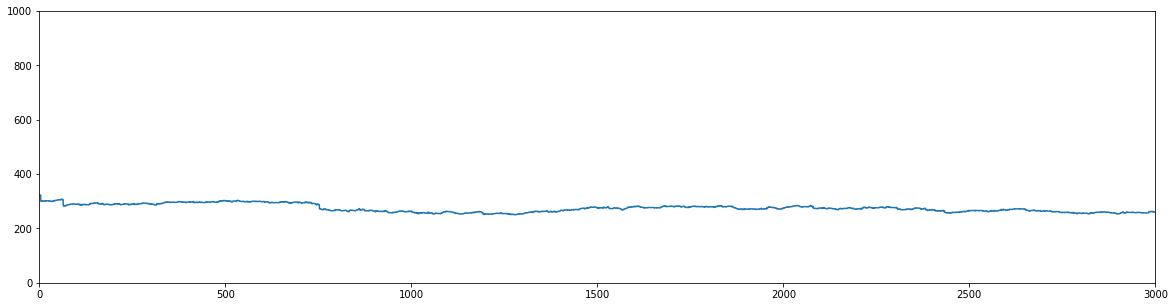

In [20]:
plt.rcParams['figure.figsize'] = [20, 5]

plt.ylim((0,N))
plt.xlim((0,3000))
plt.plot(my_network_epidemic.data_time, my_network_epidemic.data_infected_counts)

In [21]:
np.mean(my_network_epidemic.data_infected_counts[1000:])/N

0.27057108578284345

# Network 2
* number_of_communities = 50
* community_size = 20

In [22]:
np.random.seed(1)
number_of_communities = 50
community_size = 20
N = number_of_communities * community_size
network_connectedness = 1
community_connectedness = 5

sizes = [community_size for x in range(number_of_communities)]

p = [[network_connectedness/(N-community_size) for x in range(number_of_communities)] for y in range(number_of_communities)]

for i in range(number_of_communities):
    p[i][i] = community_connectedness/(community_size-1)

G = nx.generators.community.stochastic_block_model(sizes, p)

In [23]:
np.mean([node[1] for node in G.degree()])

6.11

In [24]:
np.random.seed(1)
my_network_epidemic = complex_epidemic_simulation(G,        # The network we defined earlier
                                                  beta = beta,             # Nodes emit hazard at a rate of 0.05 per day (constant rate, but can be changed)
                                                  infection_period_parameters = infection_period,       # The length of an infection is distributed exponentially
                                                  initial_infected = 321,  # 100 nodes are initially infected at time = 0
                                                  time_increment = 0.5,    # Time is incremented in half a unit of time
                                                  max_iterations = 5000,   # 3000 increments are performed, so time = 1500 at the end.
                                                  SIS = True,
                                                  custom_behaviour = contact_tracing_event)              # The epidemic is of type SIS

In [25]:
np.random.seed(1)
my_network_epidemic.iterate_epidemic()

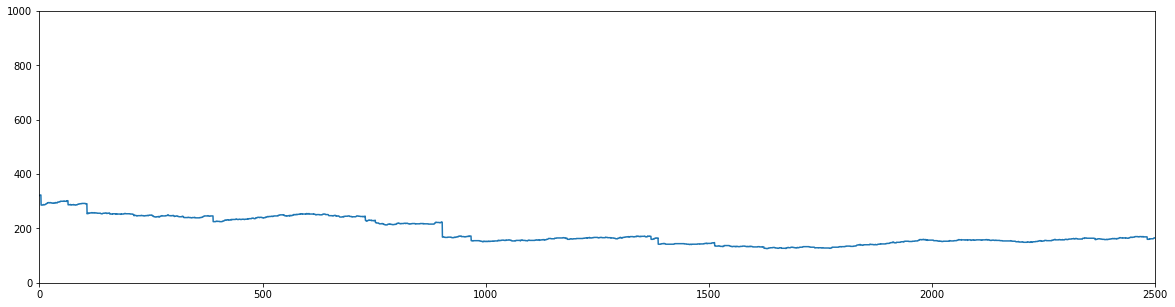

In [26]:
plt.rcParams['figure.figsize'] = [20, 5]

plt.ylim((0,N))
plt.xlim((0,2500))
plt.plot(my_network_epidemic.data_time, my_network_epidemic.data_infected_counts)

In [27]:
np.mean(my_network_epidemic.data_infected_counts[1000:])/N

0.16879480129967508

# Network 3
* number_of_communities = 10
* community_size = 100

In [39]:
number_of_communities = 10
community_size = 100
N = number_of_communities * community_size
network_connectedness = 1
community_connectedness = 5

sizes = [community_size for x in range(number_of_communities)]

p = [[network_connectedness/(N-community_size) for x in range(number_of_communities)] for y in range(number_of_communities)]

for i in range(number_of_communities):
    p[i][i] = community_connectedness/(community_size-1)

G = nx.generators.community.stochastic_block_model(sizes, p)

In [40]:
np.mean([node[1] for node in G.degree()])

5.85

In [41]:
#my_network_model = dynamic_stochastic_block_model(sizes, p, m, waiting_time_par= 10, end_time = 1500)

my_network_epidemic = complex_epidemic_simulation(G,        # The network we defined earlier
                                                  beta = beta,             # Nodes emit hazard at a rate of 0.05 per day (constant rate, but can be changed)
                                                  infection_period_parameters = infection_period,       # The length of an infection is distributed exponentially
                                                  initial_infected = 321,  # 100 nodes are initially infected at time = 0
                                                  time_increment = 0.5,    # Time is incremented in half a unit of time
                                                  max_iterations = 5000,   # 3000 increments are performed, so time = 1500 at the end.
                                                  SIS = True,
                                                  custom_behaviour = contact_tracing_event)              # The epidemic is of type SIS

In [42]:
my_network_epidemic.iterate_epidemic()

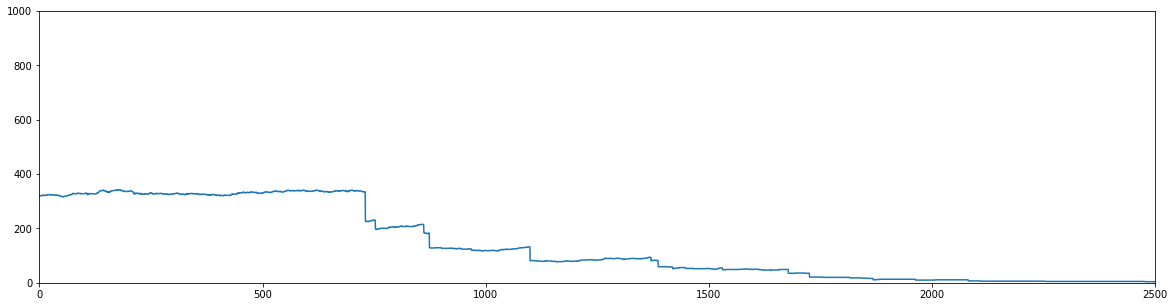

In [43]:
plt.rcParams['figure.figsize'] = [20, 5]

plt.ylim((0,N))
plt.xlim((0,2500))
plt.plot(my_network_epidemic.data_time, my_network_epidemic.data_infected_counts)

In [44]:
np.mean(my_network_epidemic.data_infected_counts[1000:])/N

0.09186453386653336